# Metoda najmniejszych kwadratów

*Niyaz Lapkouski gr. 5 (sr. 18:30)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Punkt 1

Niech mamy nadokreślony układ równań zapisany za pomocą macierzy $A: Ax=b$.
Chcemy zaproksymowac rozwiązanie metodą najmniejszych kwadratów używając macierzy pseudoodwrotnej.

$x = A^+ b$ -> $x = (A^T A)^{-1} A^T b$

Implementacja:

In [2]:
def ols_pseudoinverse(A, b):
    return np.linalg.inv(A.T @ A) @ A.T @ b

### Punkt 2

Skorzystamy z rozkładu QR dla A:

Mamy:
$A^+ = (A^T A)^{-1} A^T$

Dla rozkładu QR $A = QR$. Podstawmy:

$A^+ = ((QR)^T QR)^{-1} (QR)^T$

$A^+ = (R^T Q^T Q R)^{-1} R^T Q^T$

Q jest macierzą ortonormalną -> $Q^T Q = I$:

$A^+ = (R^T R)^{-1} R^T Q^T$

Pamiętamy $(AB)^{-1} = B^{-1} A^{-1}$, więc $A^+ = R^{-1} (R^T)^{-1} R^T Q^T$

$A^+ = R^{-1} Q^T$

Zatem rozwiązanie:
$x = A^+ b = R^{-1} Q^T b$

In [3]:
def ols_qr(A, b):
    Q, R = la.qr(A, mode='reduced')
    return np.linalg.inv(R) @ Q.T @ b

### Punkt 4

Rozważmy wielomian 7-go stopnia
$$f(x) = x^7 - 2x^6 + 3x^5 - 2x^4 + 5x^3 - 2x^2 + 3x + 10$$
i dopasujmy różne stopnie aproksymacji (1, 3, 7).

In [4]:
x_data = np.linspace(0, 10, 100)

def true_function(x):
    return x**7 - 2*x**6 + 3*x**5 - 2*x**4 + 5*x**3 - 2*x**2 + 3*x + 10

y_true = true_function(x_data)
noise = np.random.normal(5, 50, 100)
y_noisy = y_true + noise

degrees = [1, 3, 7]
results_poly = {}

for deg in degrees:
    A = np.vander(x_data, deg + 1)
    
    coeffs_pinv = ols_pseudoinverse(A, y_noisy)
    coeffs_qr = ols_qr(A, y_noisy)
    
    y_pred_pinv = A @ coeffs_pinv
    y_pred_qr = A @ coeffs_qr
    
    sse_pinv = np.sum((y_noisy - y_pred_pinv)**2)
    mse_pinv = mean_squared_error(y_noisy, y_pred_pinv)
    mae_pinv = mean_absolute_error(y_noisy, y_pred_pinv)
    r2_pinv = r2_score(y_noisy, y_pred_pinv)
    
    sse_qr = np.sum((y_noisy - y_pred_qr)**2)
    mse_qr = mean_squared_error(y_noisy, y_pred_qr)
    mae_qr = mean_absolute_error(y_noisy, y_pred_qr)
    r2_qr = r2_score(y_noisy, y_pred_qr)
    
    results_poly[deg] = {
        'coeffs_pinv': coeffs_pinv,
        'coeffs_qr': coeffs_qr,
        'y_pred_pinv': y_pred_pinv,
        'y_pred_qr': y_pred_qr,
        'sse_pinv': sse_pinv,
        'mse_pinv': mse_pinv,
        'mae_pinv': mae_pinv,
        'r2_pinv': r2_pinv,
        'sse_qr': sse_qr,
        'mse_qr': mse_qr,
        'mae_qr': mae_qr,
        'r2_qr': r2_qr
    }
    
    print(f"Stopień {deg}:")
    print(f"Metoda Pseudoodwrotna:")
    print(f"  SSE:  {sse_pinv:.2f}")
    print(f"  MSE:  {mse_pinv:.4f}")
    print(f"  MAE:  {mae_pinv:.4f}")
    print(f"  R²:   {r2_pinv:.4f}")
    
    print(f"Metoda QR:")
    print(f"  SSE:  {sse_qr:.2f}")
    print(f"  MSE:  {mse_qr:.4f}")
    print(f"  MAE:  {mae_qr:.4f}")
    print(f"  R²:   {r2_qr:.4f}")
    
    print(f"Różnica współczynników: {np.linalg.norm(coeffs_pinv - coeffs_qr):.2e}")
    print(f"Różnica predykcji:      {np.linalg.norm(y_pred_pinv - y_pred_qr):.2e}")

Stopień 1:
Metoda Pseudoodwrotna:
  SSE:  167961147336644.69
  MSE:  1679611473366.4468
  MAE:  1007254.5616
  R²:   0.5442
Metoda QR:
  SSE:  167961147336644.72
  MSE:  1679611473366.4473
  MAE:  1007254.5616
  R²:   0.5442
Różnica współczynników: 2.15e-09
Różnica predykcji:      1.38e-08
Stopień 3:
Metoda Pseudoodwrotna:
  SSE:  6169640865608.04
  MSE:  61696408656.0804
  MAE:  208918.4479
  R²:   0.9833
Metoda QR:
  SSE:  6169640865608.06
  MSE:  61696408656.0806
  MAE:  208918.4479
  R²:   0.9833
Różnica współczynników: 9.21e-08
Różnica predykcji:      1.16e-06
Stopień 7:
Metoda Pseudoodwrotna:
  SSE:  207372.08
  MSE:  2073.7208
  MAE:  36.6919
  R²:   1.0000
Metoda QR:
  SSE:  207371.97
  MSE:  2073.7197
  MAE:  36.6933
  R²:   1.0000
Różnica współczynników: 5.72e-04
Różnica predykcji:      3.29e-01


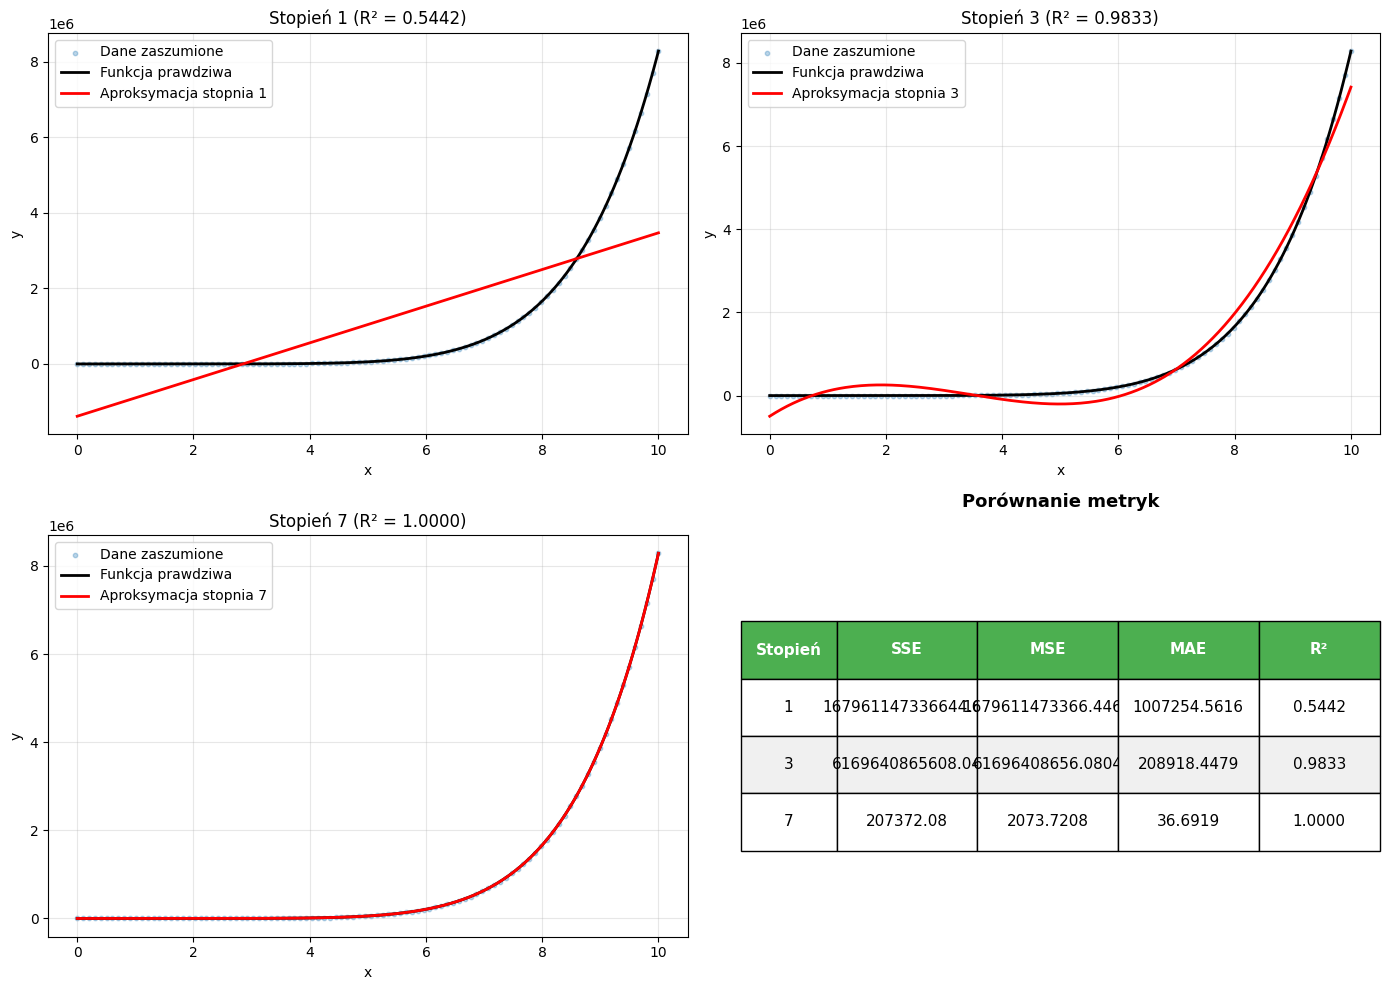

In [5]:
x_plot = np.linspace(0, 10, 300)
y_plot_true = true_function(x_plot)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, deg in enumerate(degrees):
    A_plot = np.vander(x_plot, deg + 1)
    y_plot_pred = A_plot @ results_poly[deg]['coeffs_pinv']
    
    axes[idx].scatter(x_data, y_noisy, alpha=0.3, s=10, label='Dane zaszumione')
    axes[idx].plot(x_plot, y_plot_true, 'k-', linewidth=2, label='Funkcja prawdziwa')
    axes[idx].plot(x_plot, y_plot_pred, 'r-', linewidth=2, label=f'Aproksymacja stopnia {deg}')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('y')
    axes[idx].set_title(f'Stopień {deg} (R² = {results_poly[deg]["r2_pinv"]:.4f})')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

metrics_data = [[deg,
                 f"{results_poly[deg]['sse_pinv']:.2f}",
                 f"{results_poly[deg]['mse_pinv']:.4f}",
                 f"{results_poly[deg]['mae_pinv']:.4f}", 
                 f"{results_poly[deg]['r2_pinv']:.4f}"] 
                for deg in degrees]

axes[3].axis('tight')
axes[3].axis('off')
table = axes[3].table(cellText=metrics_data,
                      colLabels=['Stopień', 'SSE', 'MSE', 'MAE', 'R²'],
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.15, 0.22, 0.22, 0.22, 0.19])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)
for i in range(len(degrees) + 1):
    for j in range(5):
        cell = table[(i, j)]
        if i == 0:
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')
axes[3].set_title('Porównanie metryk', fontweight='bold', pad=20, fontsize=13)

plt.tight_layout()
plt.show()

Jak widzimy, wielomian stopnia 1 (liniowy) nie jest w stanie uchwycić nieliniowego charakteru danych, co skutkuje słabym dopasowaniem. Wielomian stopnia 3 ma większą elastyczność, ale nadal brakuje mu wystarczającej liczby stopni swobody, aby dokładnie odwzorować funkcję 7. stopnia. Wielomian stopnia 7 osiąga najlepsze dopasowanie, ponieważ jego stopień odpowiada stopniowi funkcji generującej dane. Porównanie metody pseudoodwrotnej i rozkładu QR wykazało, że obie dają praktycznie identyczne wyniki - różnice w współczynnikach i predykcjach są rzędu błędu numerycznego.

### Punkt 5

Predykcja wagi ryby na podstawie jej wymiarów

Używamy zbioru danych Fish Dataset. Сelem jest predykcja wagi ryby ($y$) na podstawie jej wymiarów liniowych:

Cechy wejściowe:
- `Length1` - długość pionowa (cm)
- `Length2` - długość ukośna (cm)  
- `Length3` - długość poprzeczna (cm)
- `Height` - wysokość (cm)
- `Width` - szerokość (cm)

Model liniowy:
$$\text{Weight} = \beta_0 + \beta_1 \cdot \text{Length1} + \beta_2 \cdot \text{Length2} + \beta_3 \cdot \text{Length3} + \beta_4 \cdot \text{Height} + \beta_5 \cdot \text{Width}$$

Znajdziemy optymalne współczynniki $\beta$ metodą najmniejszych kwadratów (pseudoodwrotna i QR), a następnie ocenimy jakość modelu na zbiorze testowym.

In [6]:
df = pd.read_csv('Fish.csv')

print("Pierwsze wiersze danych:") # brief EDA
print(df.head())
print(f"Rozmiar zbioru: {df.shape}")
print("Statystyki:")
print(df.describe())

X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y = df['Weight'].values

X_with_bias = np.column_stack([np.ones(len(X)), X])

X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2, random_state=1)

print(f"Treningowy: {X_train.shape[0]}")
print(f"Testowy: {X_test.shape[0]}")

Pierwsze wiersze danych:
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
Rozmiar zbioru: (159, 7)
Statystyki:
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.0

In [7]:
coeffs_fish_pinv = ols_pseudoinverse(X_train, y_train)
coeffs_fish_qr = ols_qr(X_train, y_train)

print("Współczynniki modelu (pseudoodwrotna):")
print(f"  Wyraz wolny: {coeffs_fish_pinv[0]:.4f}")
for i, name in enumerate(['Length1', 'Length2', 'Length3', 'Height', 'Width']):
    print(f"  {name}: {coeffs_fish_pinv[i+1]:.4f}")

y_pred_train = X_train @ coeffs_fish_pinv
y_pred_test = X_test @ coeffs_fish_pinv

print("Metryki - zbiór treningowy:")
print(f"  MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"  MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"  R²: {r2_score(y_train, y_pred_train):.4f}")

print("Metryki - zbiór testowy:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"  R²: {r2_score(y_test, y_pred_test):.4f}")

print(f"Różnica metod: {np.linalg.norm(coeffs_fish_pinv - coeffs_fish_qr):.2e}")

Współczynniki modelu (pseudoodwrotna):
  Wyraz wolny: -484.8536
  Length1: 56.9059
  Length2: -4.6347
  Length3: -28.5448
  Height: 24.2558
  Width: 43.6835
Metryki - zbiór treningowy:
  MSE: 14198.82
  RMSE: 119.16
  MAE: 90.10
  R²: 0.8862
Metryki - zbiór testowy:
  MSE: 17504.95
  RMSE: 132.31
  MAE: 101.51
  R²: 0.8704
Różnica metod: 8.79e-11


#### Wizualizacja

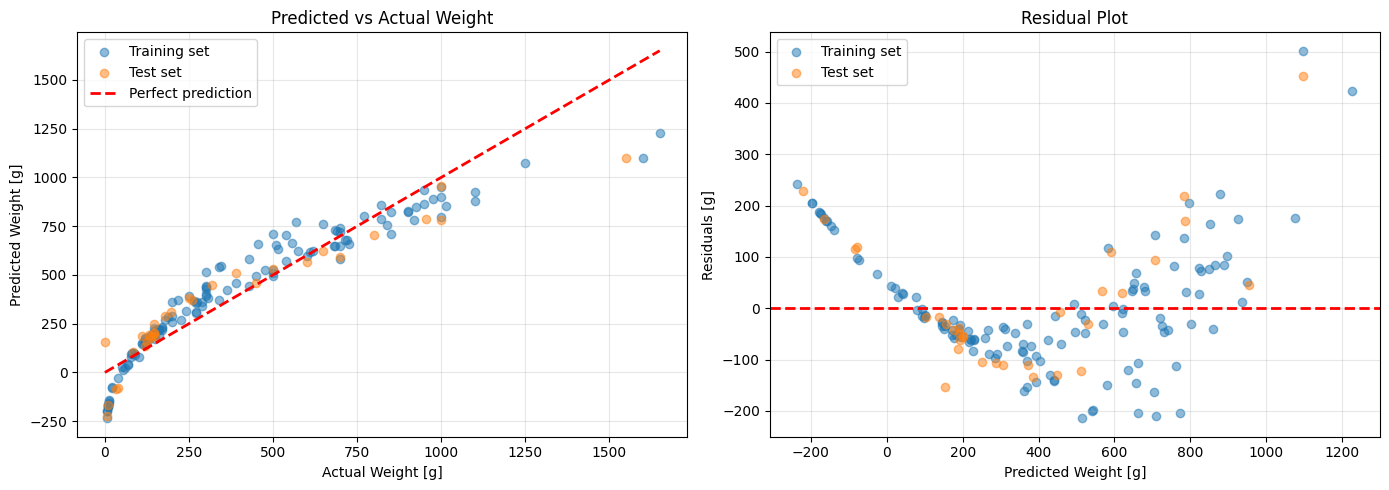

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y_train, y_pred_train, alpha=0.5, label='Training set')
axes[0].scatter(y_test, y_pred_test, alpha=0.5, label='Test set')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Weight [g]')
axes[0].set_ylabel('Predicted Weight [g]')
axes[0].set_title('Predicted vs Actual Weight')
axes[0].legend()
axes[0].grid(alpha=0.3)

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

axes[1].scatter(y_pred_train, residuals_train, alpha=0.5, label='Training set')
axes[1].scatter(y_pred_test, residuals_test, alpha=0.5, label='Test set')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Weight [g]')
axes[1].set_ylabel('Residuals [g]')
axes[1].set_title('Residual Plot')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Punkt 6

**Analiza liniowej zależności wagi od każdego z atrybutów osobno**

Sprawdzamy, jak dobrze pojedyncze cechy (Length1, Length2, Length3, Height, Width) przewidują wagę ryby w modelu liniowym:

$$\text{Weight} = \beta_0 + \beta_1 \cdot \text{Feature}_i$$

Dla każdej cechy:
1. Dopasowujemy prostą regresji
2. Obliczamy współczynnik $R^2$ (jakość dopasowania)
3. Wizualizujemy zależność

Jeśli zależność jest nieliniowa, to model liniowy będzie słaby. W takim przypadku zaproponujemy alternatywną formułę z cechami wielomianowymi.

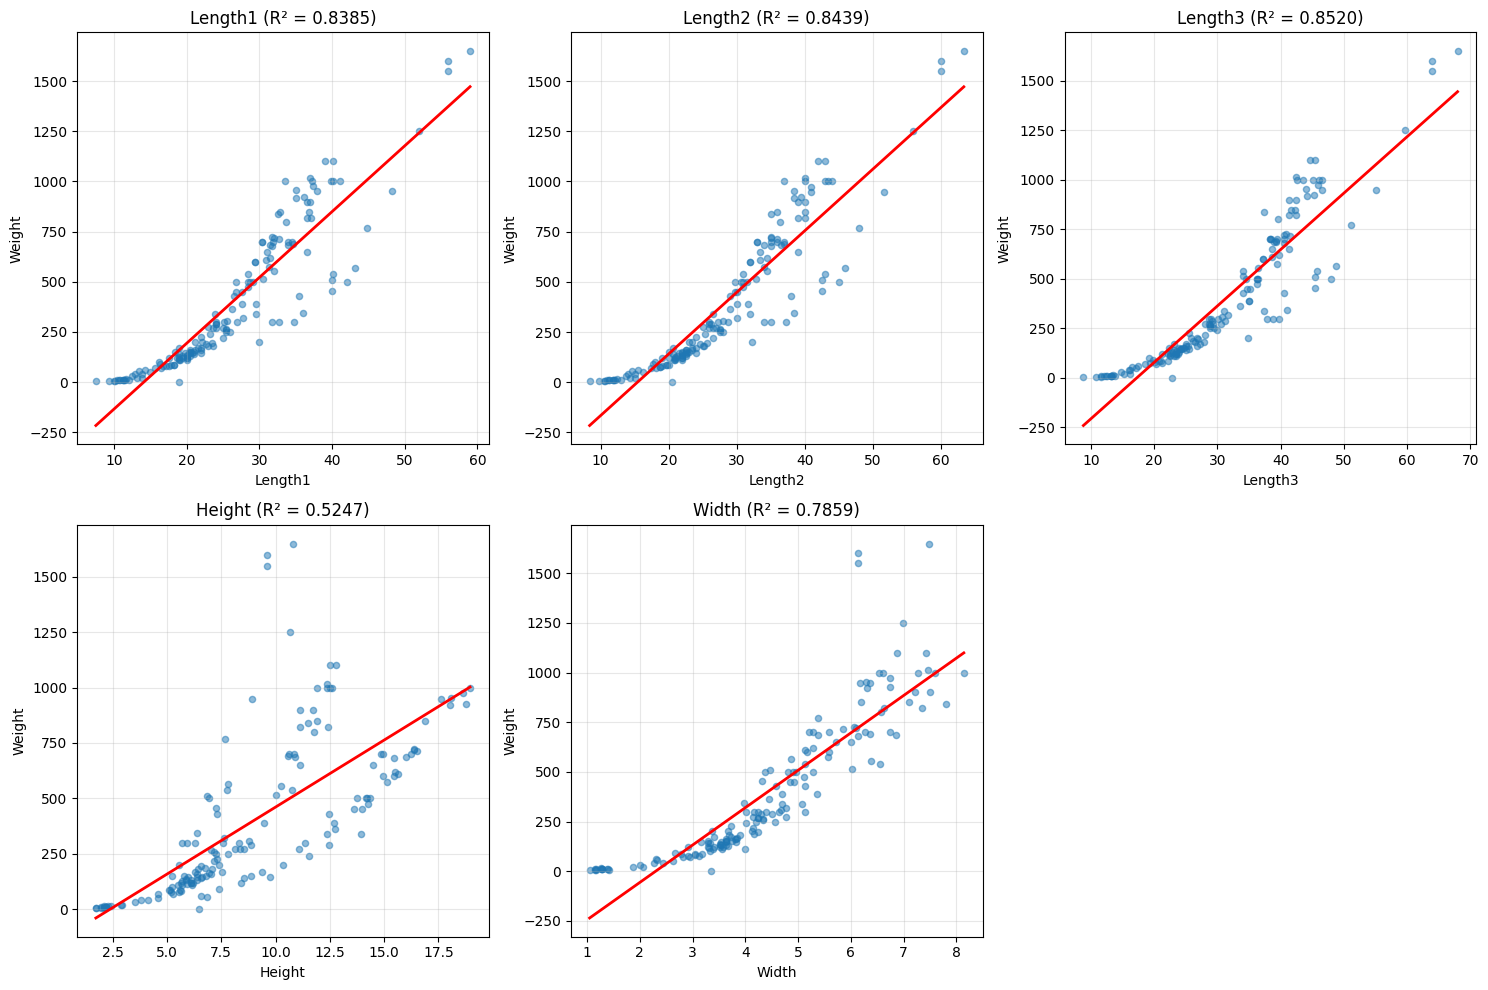

In [9]:
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
X_features = df[features].values

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(features):
    X_single = np.column_stack([np.ones(len(X_features)), X_features[:, idx]])
    coeffs_single = ols_pseudoinverse(X_single, y)
    y_pred_single = X_single @ coeffs_single
    
    r2_single = r2_score(y, y_pred_single)
    
    axes[idx].scatter(X_features[:, idx], y, alpha=0.5, s=20)
    
    x_sorted = np.sort(X_features[:, idx])
    X_sorted = np.column_stack([np.ones(len(x_sorted)), x_sorted])
    y_line = X_sorted @ coeffs_single
    axes[idx].plot(x_sorted, y_line, 'r-', linewidth=2)
    
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Weight')
    axes[idx].set_title(f'{feature} (R² = {r2_single:.4f})')
    axes[idx].grid(alpha=0.3)

axes[5].axis('off')
plt.tight_layout()
plt.show()

Obserwacje:

- Zależność nie jest liniowa dla wszystkich cech
- Waga rośnie nieliniowo wraz z wymiarami (waga ~ objętość ~ długość^3)
- Alternatywna formuła: użycie potęg cech lub ich iloczynów

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X_features)

print(f"Liczba cech oryginalnych: {X_features.shape[1]}")
print(f"Liczba cech po transformacji: {X_poly.shape[1]}")
print(f"Nazwy cech: {poly.get_feature_names_out(features)}")

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=1
)

coeffs_poly = ols_pseudoinverse(X_poly_train, y_poly_train)
print(coeffs_poly)

y_poly_pred_train = X_poly_train @ coeffs_poly
y_poly_pred_test = X_poly_test @ coeffs_poly

print("Model nieliniowy - Metryki treningowe:")
print(f"  MSE: {mean_squared_error(y_poly_train, y_poly_pred_train):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_poly_train, y_poly_pred_train)):.2f}")
print(f"  MAE: {mean_absolute_error(y_poly_train, y_poly_pred_train):.2f}")
print(f"  R²: {r2_score(y_poly_train, y_poly_pred_train):.4f}")

print("Model nieliniowy - Metryki testowe:")
print(f"  MSE: {mean_squared_error(y_poly_test, y_poly_pred_test):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_poly_test, y_poly_pred_test)):.2f}")
print(f"  MAE: {mean_absolute_error(y_poly_test, y_poly_pred_test):.2f}")
print(f"  R²: {r2_score(y_poly_test, y_poly_pred_test):.4f}")

Liczba cech oryginalnych: 5
Liczba cech po transformacji: 21
Nazwy cech: ['1' 'Length1' 'Length2' 'Length3' 'Height' 'Width' 'Length1^2'
 'Length1 Length2' 'Length1 Length3' 'Length1 Height' 'Length1 Width'
 'Length2^2' 'Length2 Length3' 'Length2 Height' 'Length2 Width'
 'Length3^2' 'Length3 Height' 'Length3 Width' 'Height^2' 'Height Width'
 'Width^2']
[190.63534659 -63.19495619   5.19142327  22.5035039  -13.90824029
  59.84923143 -82.52310167 104.31540329  44.03088352 -32.96949475
  81.15571985 -40.33296723 -15.52880274  22.3678617  -36.35132793
 -10.14401216   9.63954536 -42.32598109  -9.28834968  32.7242678
  -9.38518924]
Model nieliniowy - Metryki treningowe:
  MSE: 2035.04
  RMSE: 45.11
  MAE: 30.94
  R²: 0.9837
Model nieliniowy - Metryki testowe:
  MSE: 3305.73
  RMSE: 57.50
  MAE: 40.16
  R²: 0.9755


### Punkt 7

Porównanie modelu liniowego i wielomianowego.

Porównujemy wydajność dwóch podejść:

1. Model liniowy (Punkt 5): $\text{Weight} = \beta_0 + \sum_{i=1}^{5} \beta_i \cdot x_i$
   - 6 współczynników (bias + 5 cech)
   
2. Model wielomianowy (Punkt 6): stopień 2
   - 21 współczynników (bias + cechy liniowe + kwadratowe + interakcje)
   - Lepiej modeluje nieliniową zależność wagi od wymiarów (waga ~ objętość)

Oczekujemy, że model wielomianowy osiągnie lepsze wyniki ze względu na uwzględnienie terminów kwadratowych i interakcji między cechami.

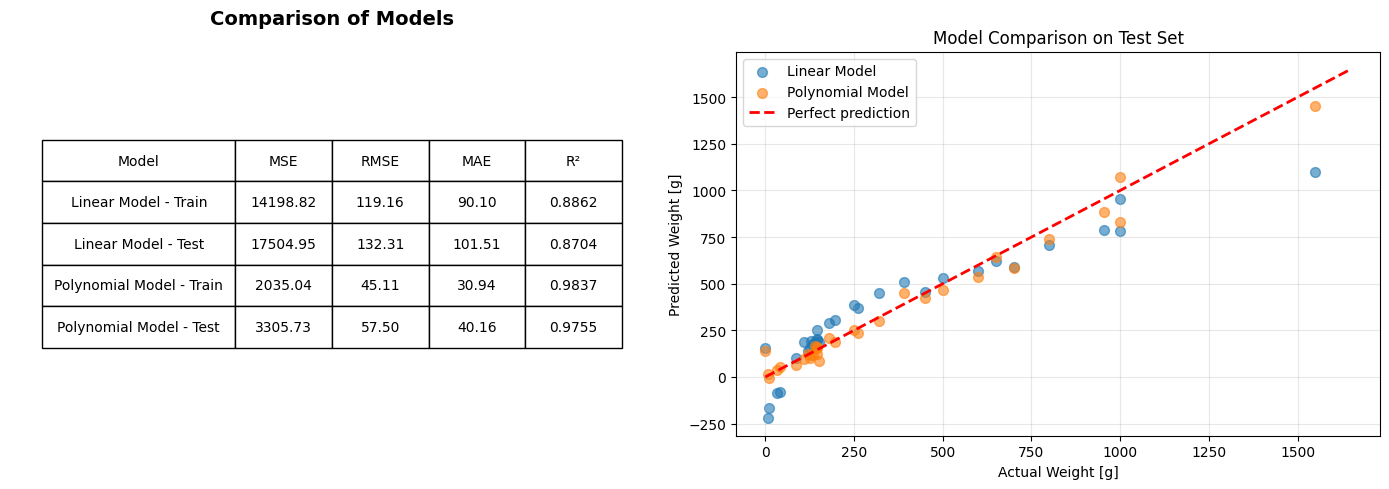

In [11]:
comparison_data = [
    ['Linear Model - Train', 
     f"{mean_squared_error(y_train, y_pred_train):.2f}",
     f"{np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}",
     f"{mean_absolute_error(y_train, y_pred_train):.2f}",
     f"{r2_score(y_train, y_pred_train):.4f}"],
    ['Linear Model - Test', 
     f"{mean_squared_error(y_test, y_pred_test):.2f}",
     f"{np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}",
     f"{mean_absolute_error(y_test, y_pred_test):.2f}",
     f"{r2_score(y_test, y_pred_test):.4f}"],
    ['Polynomial Model - Train', 
     f"{mean_squared_error(y_poly_train, y_poly_pred_train):.2f}",
     f"{np.sqrt(mean_squared_error(y_poly_train, y_poly_pred_train)):.2f}",
     f"{mean_absolute_error(y_poly_train, y_poly_pred_train):.2f}",
     f"{r2_score(y_poly_train, y_poly_pred_train):.4f}"],
    ['Polynomial Model - Test', 
     f"{mean_squared_error(y_poly_test, y_poly_pred_test):.2f}",
     f"{np.sqrt(mean_squared_error(y_poly_test, y_poly_pred_test)):.2f}",
     f"{mean_absolute_error(y_poly_test, y_poly_pred_test):.2f}",
     f"{r2_score(y_poly_test, y_poly_pred_test):.4f}"]
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.axis('tight')
ax1.axis('off')
table = ax1.table(cellText=comparison_data,
                  colLabels=['Model', 'MSE', 'RMSE', 'MAE', 'R²'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.3, 0.15, 0.15, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)
ax1.set_title('Comparison of Models', fontweight='bold', pad=20, fontsize=14)

ax2.scatter(y_test, y_pred_test, alpha=0.6, label='Linear Model', s=50)
ax2.scatter(y_poly_test, y_poly_pred_test, alpha=0.6, label='Polynomial Model', s=50)
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Perfect prediction')
ax2.set_xlabel('Actual Weight [g]')
ax2.set_ylabel('Predicted Weight [g]')
ax2.set_title('Model Comparison on Test Set')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Wnioki Końcowe:
1. Obie metody (pseudoodwrotna i QR) dają prawie identyczne wyniki (QR jest numerycznie stabilniejsza)
2. Model nieliniowy lepiej odzwierciedla fizyczną zależność (waga ~ objętość ~ długość × wysokość × szerokość), co znacząco poprawia dokładność (widzimy wyższy R²)
4. Dla wielomianów ważny jest dobór odpowiedniego stopnia (unikanie przeuczenia i niedouczenia)
5. Metryki na zbiorze testowym są kluczowe dla oceny generalizacji